# 机器学习工程师纳米学位
## 强化学习
## 项目 4: 训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个notebook文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答notebook文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的`agent.py`的实现来进行评分。 

>**提示：** Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的Q-Learning驾驶代理程序，它会操纵*智能出租车* 通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')
else:
    print "您的Python2.7环境符合要求！"

您的Python2.7环境符合要求！


In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行`agent.py`代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

### 问题 1
用几句话，描述在运行默认的`agent.py`代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的`/smartcab/`目录（这个notebook所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

**回答：**
1. 在模拟过程中，智能出租车没有动；
1. 驾驶代理程序获得的奖励各不相同，有随机正数、随机负数；
1. 在红灯禁行、绿灯亮起但对面有来车时，出租车没有动作(原地不动)，奖励为正数，红灯禁行时较高、绿灯亮起但对面有来车时很低；在交规允许通行的情况，如绿灯且对面无来车时，出租车没有通行则奖励为负数且很高(可以认为是惩罚)。

### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的`/smartcab/`的目录下，有两个文件夹：`/logs/` （之后会用到）和`/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的Python文件，然后回答下面的问题。

### 问题 2
- *在*`agent.py`* Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？*
- *在*`simulator.py`* Python 文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别是什么?*
- *在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑南北方向还是东西方向?*

**回答：**
1. learning：设置为True时，使用Q-learning算法训练创建状态-动作策略；enforce_deadline：设置为True时，强制智能出租车在规定deadline之内到达目的地，若在规定时间内未到达目的地，视为任务失败；optimized：设置为True时，可以改进Q-Learning驾驶代理程序，并输出sim_improved-learning.csv和sim_improved-learning.txt文件；
1. 当代理程序执行一个行动时，调用Environment类的act(self, agent, action)函数；
1. 'render_text()'函数不使用GUI而是使用文本的形式呈现模拟试验结果，'render()'函数使用GUI的形式呈现模拟实验结果，二者呈现的数据一致；
1. 'next_waypoint() 函数先考虑东西方向。

-----
## 实现一个基本的驾驶代理程序

创建一个优化Q-Learning的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是`None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者`'Forward'`（前进）。作为你的第一个实现，到`'choose_action()'`代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如`'self.learning'`和`'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。

可选的，你还可以通过将`'display'`标志设定为`False`来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有20个训练试验和10个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

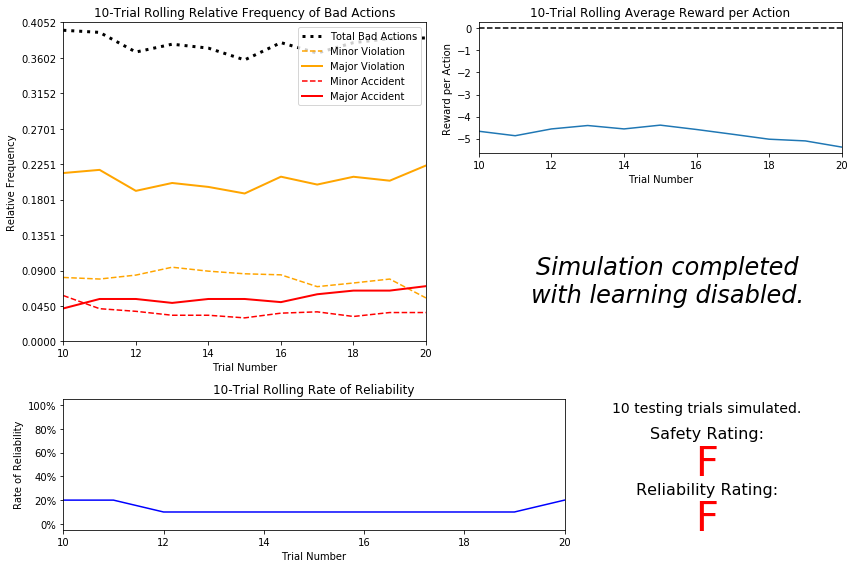

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**
1. 驾驶代理程序做出不良决策的频率如"10-Trial Rolling Relative Frequency of Bad Actions"图中黑色线段图所示，其值介于0.3与0.4之间，即代理驾驶程序有30%-40%的动作为不良决策，这些不良决策包括轻微违规、严重违规、轻微事故、严重事故，有大约1/3的不良决策造成了事故；
1. 假定代理程序是随机驾驶，可靠率合理；可靠率为F表示代理程序在合理时间内到达目的地的次数未能达到行驶次数的60%，随机驾驶的可靠率未能达到60%，说明随机驾驶的代理程序效果很差；
1. 代理程序对于它的行动会获得的奖励均为负数，且每个动作的移动平均奖励均小于-4，表明收到较严重的惩罚；
1. 随着试验次数的增加，驾驶代理程序的不良决策(包括括轻微违规、严重违规、轻微事故、严重事故)呈小幅波动但无明显上升或下降趋势、每个动作的平均奖励呈微下降趋势，其他数据未有明显变化；综上所述，表明随着试验次数的增加，结果输出没有重大变化；
1. 这个智能出租车对于乘客来说，会被人为是不安全的且不可靠的，因为其安全率为F(最不安全)、可靠率为F(最不可靠)。

-----
## 通知驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的`'如果这个处于这个状态就那个行动'`的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看`'build_state()'`代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回`None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**
1. 与安全性和效率相关性最高的特征包括：waypoint、light、left、right、oncoming；
1. 要提高驾驶代理程序的安全性，须获取代理程序所在环境的状态特征，如交通灯颜色、周围其他车辆的状态等，这些特征包括light、left、right、oncoming，并且需获取代理程序自身的状态，如即将进行的动作(waypoint)，将环境特征与代理程序即将进行的动作相结合，在不违反交规(确保安全)的前提下实施动作；要提高驾驶代理程序的效率，即要在最短时间(最优路径)内到达目的地，在本项目中，最优路径规划由RoutePlanner类的next_waypoint()函数完成，在build_state()函数中获取的waypoint即为最优路径中需要执行的单步动作；
1. build_state()代理程序函数中的deadline特性没有使用；如2中所述，RoutePlanner类已计算出最优路径，deadline只是给出距离目的地的剩余(驾驶)动作步数，与解决本问题关系不大；并且在训练和测试过程中，每集(Episode)的起始位置、终止位置(随机产生)均不相同，由此计算出的deadline不尽相同，其值也不具有泛化能力和实际含义，增加该特性，会极大地增加不必要的状态空间大小，是提高状态-动作策略的泛化能力的障碍，因此不选用该特性。

### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.
发生如`(False, True, True, True, False, False, '3AM')`的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题4**中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**
1. 选用waypoint、light、left、right、oncoming特征定义状态空间，其大小为——本项目中定义驾驶的有效动作为4个(None, 'forward', 'left', 'right')，信号灯状态为2个('green','red')，waypoint不考虑红绿灯情况，因此只有3个动作'forward', 'left', 'right'；各特征之间并非两两相互独立(不相关)，在不考虑交通规则限制的情况下，状态空间最大为3\*2\*4\*4\*4=384；
1. 状态空间为384，每个状态对应4个动作，在理想情况下，每次动作均能建立新状态或者更新已有状态对应的原Q值为初始值0.0的动作的Q值，则需要384\*4=1536个动作，经多次训练后统计，智能驾驶代理程序每次(每轮、Episode)训练需要进行的动作平均大约为17次左右，则最少训练次数为1536/17约为91次。在实际训练时，不可能每次动作均会增加新状态或更新具有初始值0.0的动作Q值，在本项目中有大约50%-65%的动作是依据极大Q值给出的，即这些动作没有新增Q-table决策信息(依据Q极大值选定并执行的动作其奖励亦为正数，据此更新Q-table后，原极大值对应的动作不变)；另一方面，实际建立的Q-table，其每个状态对应各动作的Q值并非全不为初始值，即有的动作并没有被训练到，但此时该Q-table仍是有效的，其状态-动作策略能够使智能驾驶代理程序在测试时获得很高的安全性、可靠性评分。综上所述，假定平均每次训练可以得到1.7个有效的动作决策信息，经1000次训练时，可有机会得到最大1700个动作(大于1536个动作)，因此认为智能驾驶代理程序的合理训练数量为1000次左右；
1. 在考虑交通规则及RoutePlanner类计算得出的waypoint的情况下，经过合理数量的训练之后，代理驾驶能学到一个较好的策略。

### 更新驾驶代理程序的状态
要完成你的第二个实现，去到`'build_state()'`代理程序函数。根据你在**问题4**给出的判断，你现在要将`'state'`变量设定为包含所有Q-Learning所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：** 观察时记住重置模拟程序的标志到默认设定！

-----
## 实现Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是开始实现Q-Learning自身的功能。Q-Learning的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在Q-table里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的Q-value。当然，Q-Learning还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的Q-learning算法，不含折扣因子。遵从每个代理程序函数的**TODO**下的实现指导。

注意代理程序的属性`self.Q`是一个字典：这就是Q-table的构成。每个状态是`self.Q`字典的键，每个值是另一个字典，包含了*action*和*Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减*$\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$会向0减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当$\epsilon$达到特定阈值后（默认阈值为0.01），代理程序被以它所学到的东西来作检测。作为初始的Q-Learning实现，你将实现一个线性衰减$\epsilon$的函数。

### Q-Learning模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。

此外，使用下面的$\epsilon$衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

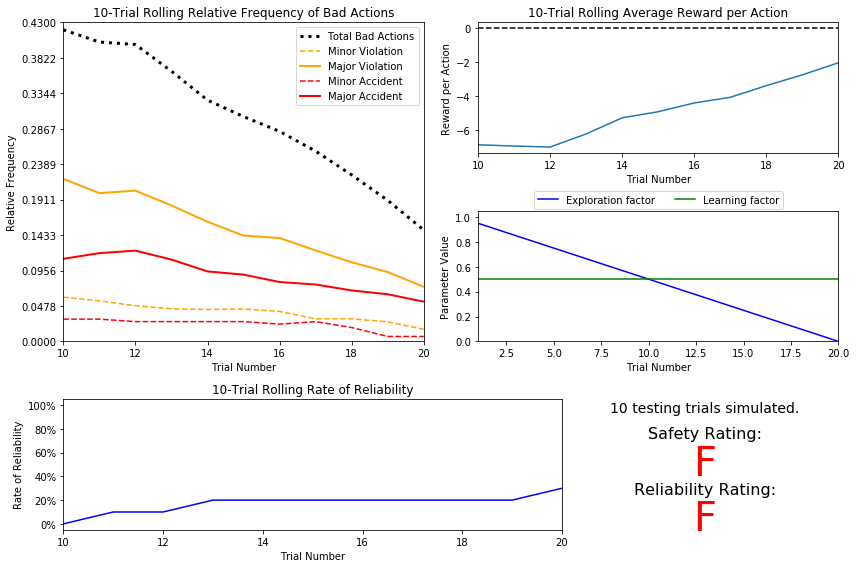

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的Q-Learning模拟中得到的可视化结果，像在**问题3**那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了Q-table存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的$\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的$\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

**回答：**
1. 基本驾驶代理程序和默认的Q-Learning代理程序的相似之处包括：安全性评分、可靠性评分均为F；
1. 在测试之前驾驶代理大约需要做至少20次训练试验；ϵ初始值为1，线性衰减步长为0.05，当训练实验进行到第20次时，其达到最小值0.0并小于容忍度tolerance，因此在给定的ϵ容忍度下，训练至少20次是合理的；
1. 项目实现的ϵ准确地在参数面板中显示；
1. 随着实验数的增加，不良动作的数目呈减小趋势，平均奖励呈上升趋势；
1. 与初始的驾驶代理程序相比，安全性评分、可靠性评分均为F，没有发生变化。

-----
## 改进Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是执行优化！现在Q-Learning算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果$\epsilon = 1$并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的Q-Learning实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进Q-Learning的模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。
- `'optimized'` - 将此标志设定为`'True'`来告诉驾驶代理你在执行一个优化版本的Q-Learning实现。

优化Q-Learning代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的学习率。
- `'epsilon'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是0.05）来设定测试的epsilon阈值。

此外，使用一个你选择的$\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到`'tolerance'`。Q-Learning代理程序到此才可以开始测试。某个衰减函数的例子($t$是试验的数目)： 

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用$\alpha$ （学习率） 的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式$0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为A的评分。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

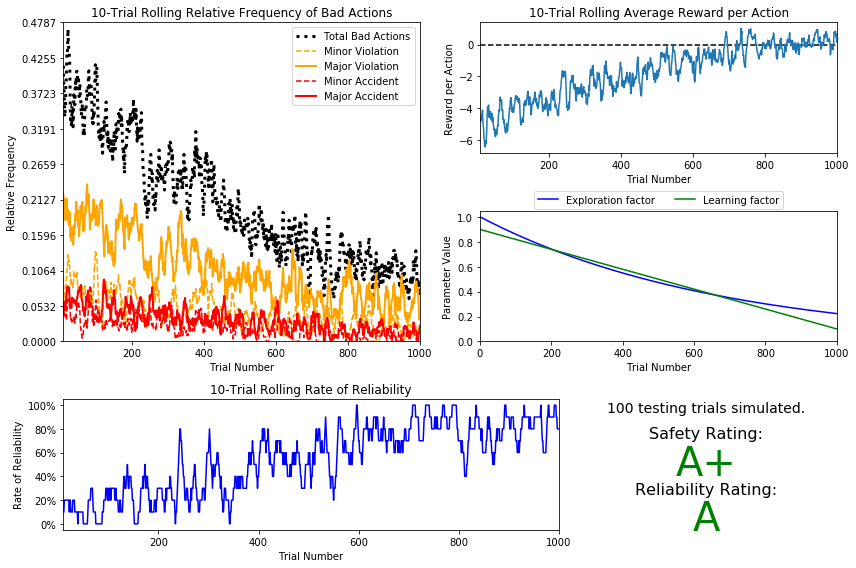

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### 问题7
利用上面的从你改进的Q-Learning模拟中得到的可视化结果，像在**问题6**那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么epsilon（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么epsilon-tolerance和alpha（学习率）值？为什么？*
- *与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？ *
- *你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

**回答：**
1. 在调整参数时，可调参数包括epsilon(探索因子)和alpha(学习率)，其取值范围均为[0,1]；epsilon(探索因子)用于在探索和利用中取折衷，其值为0时表示仅利用，其值为1时表示仅探索，epsilon取中间值时表示以epsilon的概率进行探索，以1-epsilon的概率进行利用，对于本项目而言，初始时应当仅探索，随着训练数量不断增大，训练效果逐步积累，此时应减小epsilon值，让智能驾驶代理程序利用之前的训练效果，选择Q值最大的动作；alpha(学习率)用于在历史训练结果和本次训练结果中取折衷，alpha(学习率)较大时，保留之前的训练结果较少，保留本次训练结果较多，alpha(学习率)较小时，保留之前的训练结果较多，保留本次训练结果较少；初始时，Q-table中无之前的训练结果，因此可以设置较大的alpha(学习率)，随着训练的增加，Q-table中具有的训练结果逐步增加，此时需要降低alpha(学习率)，以保留之前的学习效果。
1. 使用的衰减函数为(a=0.0015)：$$ \epsilon = e^{-at}, \textrm{for } 0 < a < 1\hspace{50px}$$
1. 在测试之前驾驶代理需要做1000次训练试验。
1. epsilon-tolerance为0.2235，alpha（学习率）初始为0.9，线性衰减步长为0.0008，训练结束时其值为0.099999。epsilon-tolerance控制训练的次数，训练次数越多，在Q-table中构建的状态-行为策略越多且同一状态对应的各动作的奖赏(含惩罚)值越丰富，越利于提高驾驶代理程序在测试时的安全性评分和可靠性评分；理论上，训练次数足够多时，可以构建最大状态空间(384条策略)，且每个策略的不同动作均有奖赏(含惩罚)值，此后再进行测试时，可达到最优效果；结合问题5中对状态空间的计算和分析，对照测试的安全性(A+)、可靠性评分(A)结果，认为epsilon-tolerance的取值是合适的；alpha(学习率)的说明见回答1中的相关文字，经多次测试后，线性衰减alpha(学习率)可以达到较好的训练效果。
1. 与之前默认的Q-Learning学习器相比，该学习器有了很大改进，将安全性评分提升到A+，可靠性评分提升到A。
1. 驾驶代理程序成功地学习了一个合适的策略。
1. 对智能出租车的安全性和可靠性评分满意。

### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看`'sim_improved-learning.txt'`文本文件，看你的改进的Q-Learning算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。

**回答：** 
1. 状态定义为('light', 'oncoming', 'left', 'right', 'waypoint')对应的值元组，如('red', None, 'left', 'forward', 'left')；
1. 对于给定状态，策略（得分最高的动作）正确；
1. 我们训练智能驾驶代理程序的目的在于给定起始位置、目的位置后，智能出租车能在确保安全的前提下、最快速地到达目的位置(按照最短路径到达目的位置)；最优策略应该是这种情况：状态-动作策略中应包含智能出租车的车头方向信息带来的影响，该方向信息根据智能出租车当前位置及目的位置求出、可以发生变化但始终指向目的位置，结合本项目状态-动作策略中的动作及Q值，智能驾驶代理程序执行动作后，查看车头方向是否与原方向信息一致，若一致则奖励，否则惩罚，并返回相应值，经过训练后，可由此得到最优策略；现有状态-动作策略中不包含车头方向信息带来的影响，即存在这样的可能：在某状态依据Q最大值执行相应的动作，但该动作不利于快速到达目的位置，甚至有可能导致智能出租车与待到达的目的位置方向相反，此时违反了最短路径原则，由此可能会导致驾驶代理程序的可靠性水平降低，对于该类状态，当前策略不是最优策略；
1. 对于如下策略：<br>
('green', 'forward', 'right', None, 'forward')<br>
 -- forward : 1.64<br>
 -- right : 0.60<br>
 -- None : -4.32<br>
 -- left : -14.49<br>
 智能出租车面对绿灯信号，对面车辆直行，左侧有车辆右拐，右侧无车辆，RoutePlanner类给出的建议动作为直行(forward)；依据状态-动作策略选择动作时，不考虑RoutePlanner类给出的建议，但建议动作是依据智能出租车当前位置和目的位置计算得出的最短路径前进方向，可供策略分析时参考；从策略可以看出，forward的Q值最高，应该选此动作，若选择右拐，可能会偏离目的位置(RoutePlanner类给出的建议是forward)，进而影响可靠性评分，若停止不动，违反交规，会受到惩罚，若左转，会与对面直行车辆导致撞车交通事故(等级为4)，综上所述，选择Q值最高的forward动作是最优动作，因此本条策略为正确的策略。
 
('red', None, 'left', 'forward', 'left')<br>
 -- forward : -34.99<br>
 -- right : -18.28<br>
 -- None : 2.23<br>
 -- left : -35.57<br>
 智能出租车面对红灯信号，对面无车辆，左侧有车辆左拐，右侧有车辆直行，RoutePlanner类给出的建议动作为左拐(left)，如果此时遵从建议，会导致撞车交通事故(等级为4)。从策略可以看出，训练时，代理驾驶程序尝试了所有可能的动作并获得对应的奖励与惩罚，结合本项目(Environment类)定义的交通规则及违规、事故等级可知，若代理驾驶程序直行或者左拐，均会导致严重交通事故(等级为4)，其对应的动作奖赏最少(惩罚最重)；若代理驾驶程序右拐，则导致轻微违规(等级为1)，其对应的奖赏较少(惩罚较轻)；若代理驾驶程序停止不动，则不违反交通规则，此时奖赏最大，即为当前策略的最优动作，是正确的策略。
 

-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为Q-Learning算法的一部分，之前要求你在实现中**不要**使用折扣引子`'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给Q-value带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个Q-Learning算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**
1. 更新Q-table的公式为：<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/390d024c2ee2a2c2f709642401a3a7b44f7b2e4e">
从公式中可以看出，与折扣引子'gamma'相乘的部分为maxQ(s',a)，其中s'表示下一个状态；'gamma'表示牺牲当前收益，换区长远收益的程度，其值为0时，表示只顾眼前利益，不考虑长期回报，其值为1时，表明长期回报和眼前利益同样重要；maxQ(s',a)表示在已有的Q-table的基础上，执行下一个状态对应的(各)动作时所得奖赏的最大值，即执行与下一个状态对应的最优动作的奖赏(最优动作对应于最大奖赏)；当'gamma'取值为(0,1]时，表明在执行当前状态对应的动作后，下一个具体状态是确定已知的，且考虑历史Q值对更新当前状态-动作策略的影响。
1. 对于本项目而言，智能出租车进行每次训练时，其起始位置、目的位置均不相同，从起始位置到目的位置期间建立的状态转移矩阵也不相同；事实上，在保证可靠性评分(在规定时间内到达目的位置)的情况下，建立状态转移矩阵只会让问题更加复杂且不利于得到简单高效的Q-table，鉴于上述原因，无需建立该状态转移矩阵；'gamma'与maxQ(s',a)的乘积表明用基于状态转移矩阵的历史训练成果来更新当前动作状态-状态策略的Q值，由于没有状态转移矩阵，因而不使用折扣因子'gamma'。
1. 智能出租车到达目的地为多步动作，每步的环境各不相同(相互独立)，代理驾驶程序在当前状态下执行某个动作不能确定下一个具体状态，下一个状态是随机的；并且，代理驾驶程序虽然知道目的位置及大方向，但是不能确定还需要行驶多少步(进行多少动作)才能到达目的位置，因此无法计算Q-table更新公式(1中的公式)中的maxQ(s',a)项，故将'gamma'取值为0，即不使用折扣因子。

> **注意**:当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。